In [1]:
import nltk

In [2]:
# nltk.download() ; nltk contains a bunch of data to be downloaded which contains a bunch of corpuses![

In [3]:
# So we will just Download some of the corpuses 
nltk.download('treebank')
nltk.download('brown')
nltk.download('conll2000')

[nltk_data] Downloading package treebank to /Users/arsh/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package brown to /Users/arsh/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /Users/arsh/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

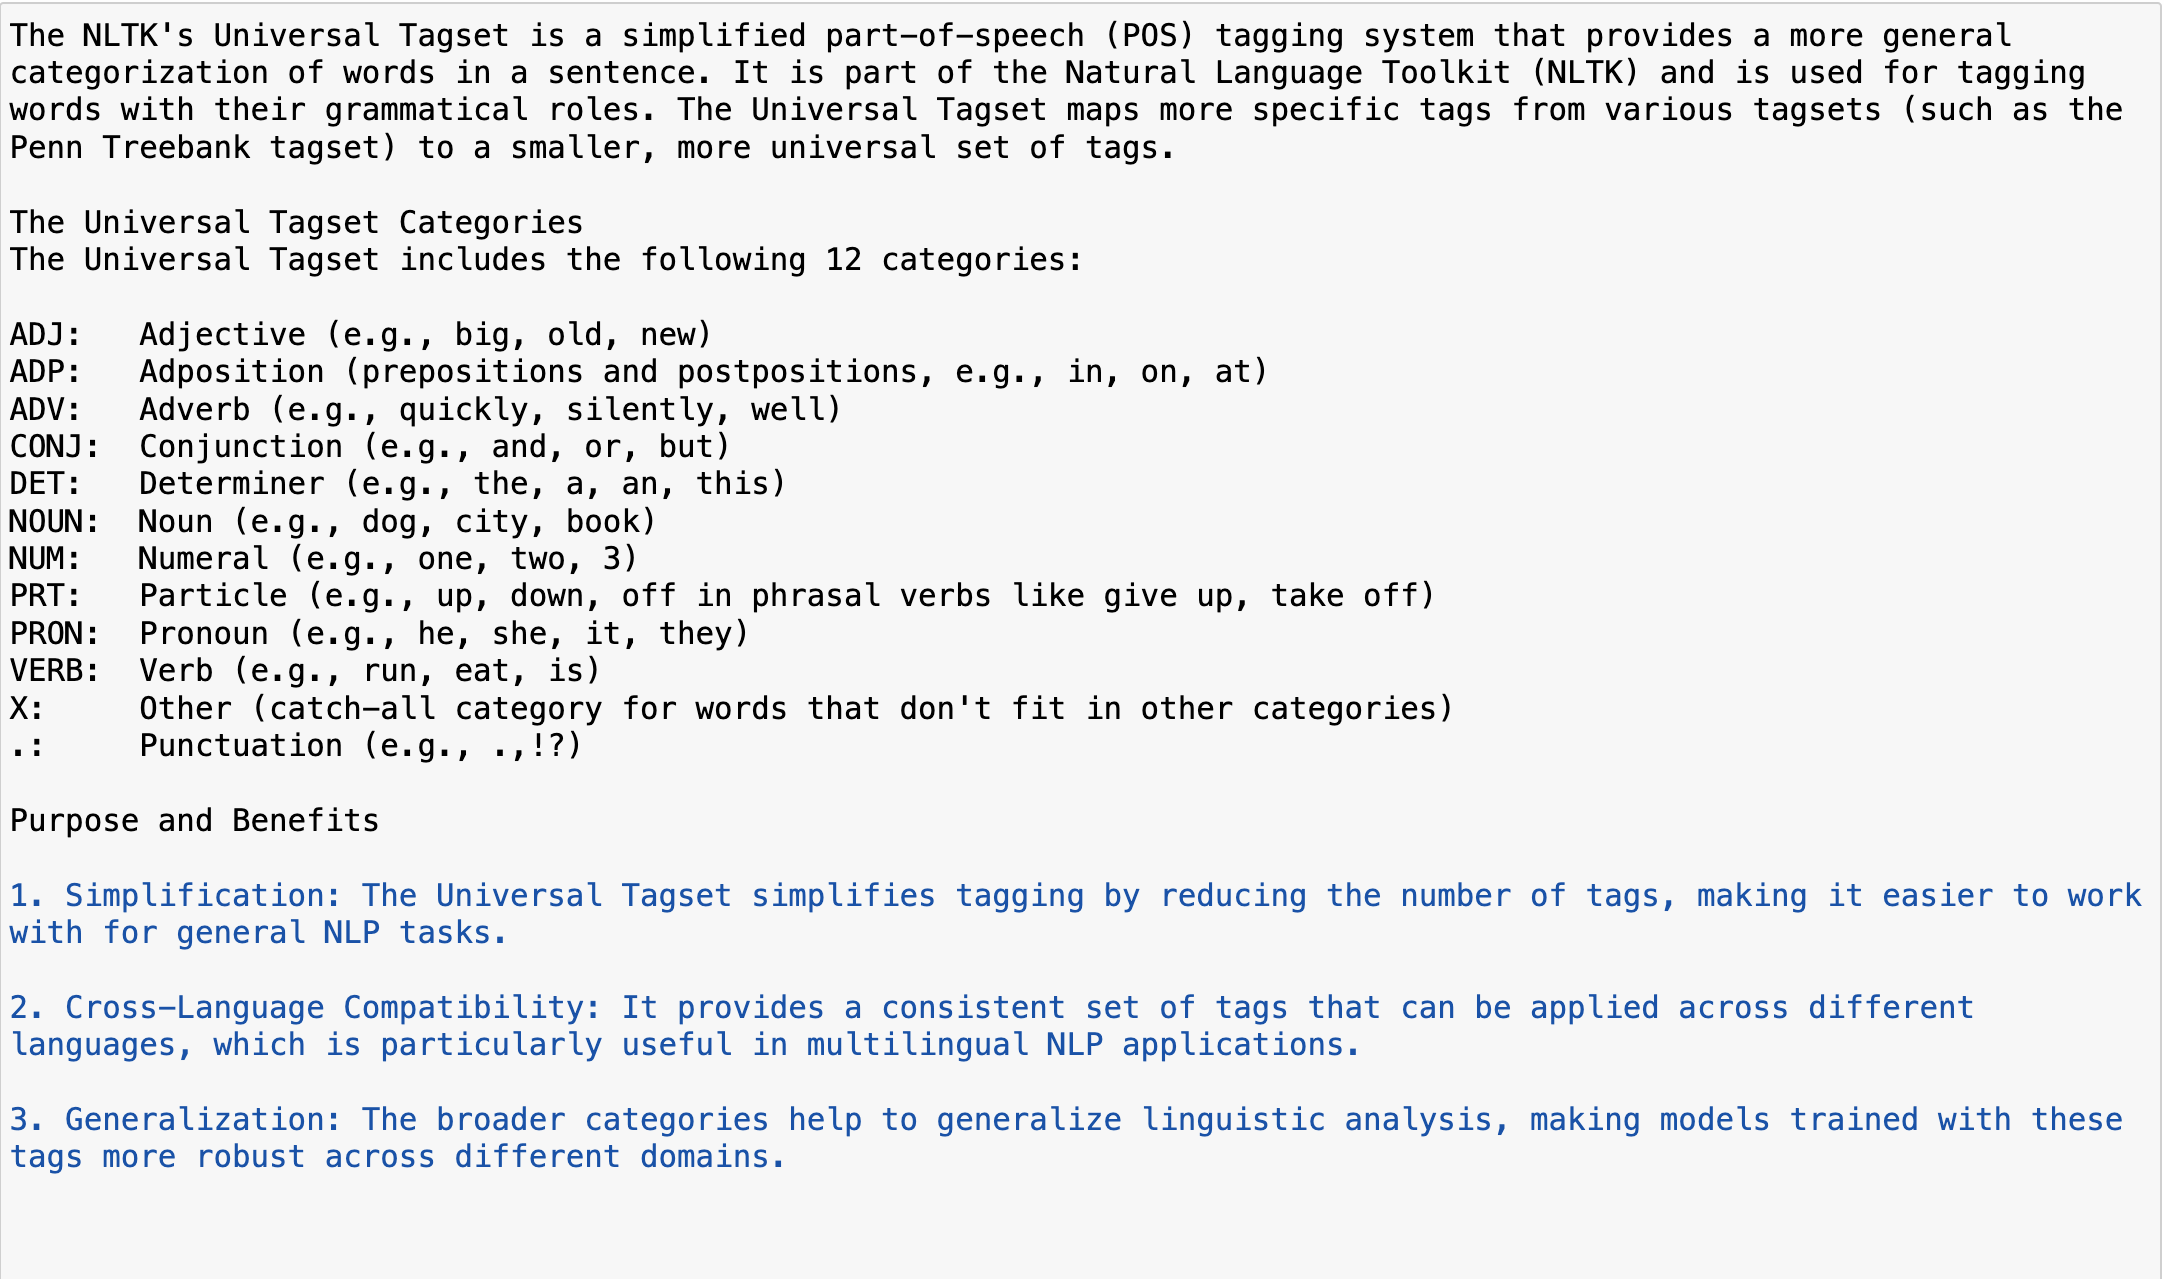



In [4]:
nltk.download('universal_tagset')  

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/arsh/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [5]:
nltk.corpus.treebank.tagged_sents()

[[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')], [('Mr.', 'NNP'), ('Vinken', 'NNP'), ('is', 'VBZ'), ('chairman', 'NN'), ('of', 'IN'), ('Elsevier', 'NNP'), ('N.V.', 'NNP'), (',', ','), ('the', 'DT'), ('Dutch', 'NNP'), ('publishing', 'VBG'), ('group', 'NN'), ('.', '.')], ...]

In [6]:
# WE COME TO A CONCLUSION THAT EACH tagged_sent list CONTAINS Lists OF ALL THE tagged sentences which are in form of
# list of words 

In [7]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

In [8]:
print(len(nltk.corpus.treebank.tagged_sents()))
print(len(nltk.corpus.brown.tagged_sents()))
print(len(nltk.corpus.conll2000.tagged_sents()))

3914
57340
10948


3914 + 57340 + 10948  = 72,292

In [9]:
# LET US JOIN ALL THE TAGGED SENTENCES FROM ALL THE CORPUSES WE DOWNLOADED

In [10]:
tagged_sents = nltk.corpus.treebank.tagged_sents(tagset='universal') +\
               nltk.corpus.brown.tagged_sents(tagset='universal') +\
               nltk.corpus.conll2000.tagged_sents(tagset='universal')
              
              

In [11]:
tagged_sents

[[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ('61', 'NUM'), ('years', 'NOUN'), ('old', 'ADJ'), (',', '.'), ('will', 'VERB'), ('join', 'VERB'), ('the', 'DET'), ('board', 'NOUN'), ('as', 'ADP'), ('a', 'DET'), ('nonexecutive', 'ADJ'), ('director', 'NOUN'), ('Nov.', 'NOUN'), ('29', 'NUM'), ('.', '.')], [('Mr.', 'NOUN'), ('Vinken', 'NOUN'), ('is', 'VERB'), ('chairman', 'NOUN'), ('of', 'ADP'), ('Elsevier', 'NOUN'), ('N.V.', 'NOUN'), (',', '.'), ('the', 'DET'), ('Dutch', 'NOUN'), ('publishing', 'VERB'), ('group', 'NOUN'), ('.', '.')], ...]

In [12]:
len(tagged_sents)

72202

In [13]:
# NOW OUR MODEL SHOULD TAKE IN A SENTENCE IE A SEQUENCE OF WORDS AND IT SHOULD OUTPUT A SEQUENCE OF TAGS FOR IT 
# CORRESPONDING TO EACH WORD IN THE SENTENCE SO WE NEED TO SEPARATE OUR SENTENCES AND TAGS AS INDEPENDENT AND 
# DEPENDENT FEATURES

In [15]:
sentences = []
tags = []
for i in tagged_sents:
    s, t = zip(*i)   # unzipping each sentences and tag pair in tagged_sents
    sentences.append(list(s))
    tags.append(list(t))

In [16]:
print(len(sentences[0]))
print(len(tags[0]))

18
18


In [17]:
# WE CAN USE KERAS LIBRARY THAT DOES TOKENIZATION AUTOMATICALLY and FILTERS UNWANTED WORDS,
# LOWERS WITH INBUILT FUNCTIONS

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(sentences, tags, test_size=0.2, random_state=0)

WE WILL SPLIT OUR DATA INTO TRAIN AND TEST BEFORE CONVERTING INTO VECTORS BECAUSE , IF WE SPLIT THE DATA AFTER CONVERTING INTO VECTORS THEN WE HAVE INCOMPLETE VOCABULARY IN OUR TRAIN DATA AS SOME OF OUR VOCABULARY GOES TO TO TEST DATA, AND HENCE THE TRAIN DATA LOSES ITS MEANING WITHOUT THE PRESENCE OF ENTIRE DATA IT CO-RELATES TO WHICH LEADS TO WRONG PREDICTIONS . HENCE WE SPLIT FIRST AND THEN CONVERT OUR TRAIN DATA INTO ONE ENTIRE VOCABULARY 

In [19]:
import keras
import tensorflow as tf

In [20]:
x_train_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
y_train_tokenizer = tf.keras.preprocessing.text.Tokenizer() # we will not run out of vocabulary for tags because they are a handful

In [21]:
x_train_tokenizer.fit_on_texts(x_train)
y_train_tokenizer.fit_on_texts(y_train)

In [22]:
y_train_tokenizer.word_index

{'noun': 1,
 'verb': 2,
 '.': 3,
 'adp': 4,
 'det': 5,
 'adj': 6,
 'adv': 7,
 'pron': 8,
 'conj': 9,
 'prt': 10,
 'num': 11,
 'x': 12}

In [23]:
x_train_tokenizer.word_index

{'<OOV>': 1,
 'the': 2,
 ',': 3,
 '.': 4,
 'of': 5,
 'and': 6,
 'to': 7,
 'a': 8,
 'in': 9,
 'that': 10,
 'for': 11,
 'is': 12,
 '``': 13,
 'was': 14,
 "''": 15,
 'it': 16,
 'he': 17,
 'as': 18,
 'with': 19,
 'on': 20,
 'be': 21,
 'his': 22,
 'at': 23,
 'by': 24,
 'from': 25,
 'this': 26,
 ';': 27,
 'are': 28,
 'had': 29,
 'i': 30,
 'but': 31,
 'or': 32,
 'have': 33,
 'not': 34,
 'an': 35,
 '?': 36,
 'they': 37,
 'which': 38,
 '--': 39,
 'said': 40,
 'were': 41,
 'one': 42,
 'has': 43,
 'you': 44,
 'would': 45,
 'all': 46,
 'their': 47,
 'will': 48,
 "'s": 49,
 'her': 50,
 'its': 51,
 'we': 52,
 'there': 53,
 'she': 54,
 'been': 55,
 'more': 56,
 'who': 57,
 '$': 58,
 'him': 59,
 'when': 60,
 'new': 61,
 'if': 62,
 'about': 63,
 ')': 64,
 'out': 65,
 'up': 66,
 '(': 67,
 'than': 68,
 'no': 69,
 ':': 70,
 'mr.': 71,
 'so': 72,
 'other': 73,
 'what': 74,
 'some': 75,
 'can': 76,
 'into': 77,
 'only': 78,
 'them': 79,
 'could': 80,
 '%': 81,
 'time': 82,
 'two': 83,
 'million': 84,
 'thes

In [24]:
# NOW WE KNOW EACH WORD HAS SOME INDEX , LET US CONVERT SENTENCES INTO PROPER SEQUENCE NOW 
# texts_to_sequence coverts our text into a sequence of words , words represented by integer

In [25]:
x_train_seqs = x_train_tokenizer.texts_to_sequences(x_train)
y_train_seqs = y_train_tokenizer.texts_to_sequences(y_train)

In [26]:
print(len(x_train_seqs[0]))
print(len(y_train_seqs[0]))

24
24


In [27]:
print((x_train_seqs[0]))
print((y_train_seqs[0]))

[1982, 8, 240, 1114, 11, 2, 162, 3, 17, 14, 2840, 671, 1644, 60, 35, 3109, 7264, 29231, 298, 403, 7, 22, 299, 4]
[2, 5, 1, 7, 4, 5, 1, 3, 8, 2, 2, 1, 7, 7, 5, 6, 1, 2, 7, 7, 4, 5, 1, 3]


NOW EACH SENTENCE IN x_train IS REPRESENTED AS A SEQUENCE OF WORDS Words that have been given indexes

In [28]:
print(x_train[0])
print(x_train_seqs[0])
#print(x_train_tokenizer.sequences_to_texts(x_train[0]))
print(x_train_tokenizer.sequences_to_texts([x_train_seqs[0]]))

['Setting', 'a', 'course', 'straight', 'for', 'the', 'house', ',', 'he', 'was', 'covering', 'ground', 'fast', 'when', 'an', 'angry', 'bee', 'buzzed', 'past', 'close', 'to', 'his', 'face', '.']
[1982, 8, 240, 1114, 11, 2, 162, 3, 17, 14, 2840, 671, 1644, 60, 35, 3109, 7264, 29231, 298, 403, 7, 22, 299, 4]
['setting a course straight for the house , he was covering ground fast when an angry bee buzzed past close to his face .']


In [29]:
# AS WE KNOW OUR RNNS ARE CAPABLE OF HANDLING VARIABLE INPUT LENGTHS BUT IT IS STILL PROFITABLE TO PAD OUR SENTENCES

In [30]:
max_len = len(max(x_train_seqs, key=len))

In [31]:
x_train_seqs_padded = keras.preprocessing.sequence.pad_sequences(x_train_seqs, padding='post', 
                                                            maxlen=max_len)

In [32]:
x_train_seqs_padded[0]

array([ 1982,     8,   240,  1114,    11,     2,   162,     3,    17,
          14,  2840,   671,  1644,    60,    35,  3109,  7264, 29231,
         298,   403,     7,    22,   299,     4,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [33]:
max_len

180

In [34]:
y_train_seqs_padded = keras.preprocessing.sequence.pad_sequences(y_train_seqs, padding='post', 
                                                            maxlen=max_len)

In [35]:
y_train_seqs_padded[0]

array([2, 5, 1, 7, 4, 5, 1, 3, 8, 2, 2, 1, 7, 7, 5, 6, 1, 2, 7, 7, 4, 5,
       1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int32)

In [36]:
y_train_seqs_categorical = keras.utils.to_categorical(y_train_seqs_padded)   # since our output will be from softmax we need categories for each tag

In [37]:
y_train_seqs_categorical[0]

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [38]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense

In [39]:
voc_size = len(x_train_tokenizer.word_index) + 1

In [40]:
word_features = 30

In [41]:
from tensorflow.keras.layers import LSTM
model = Sequential()
model.add(Embedding(voc_size, word_features, mask_zero=True))   # The embedding layer has a mask_zero parameter. We added padding in order to make our batches the same size, but we don't want the model to make PoS predictions on padding. Setting mask_zero to True makes the layers following the embedding layer ignore padding values.
model.add(Bidirectional(LSTM(50, return_sequences=True)))  # return sequnce Whether to return the last output in the output sequence, or the full sequence. Default: False.
model.add(Dense(13, activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [42]:
len(y_train_tokenizer.word_index)

12

In [43]:
model.build((None, max_len))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 180, 30)        │     1,613,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 180, 100)       │        32,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 180, 13)        │         1,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,647,113 (6.28 MB)

 Trainable params: 1,647,113 (6.28 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.fit(x_train_seqs_padded, y_train_seqs_categorical, epochs=20, batch_size = 200)

Epoch 1/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 62s 211ms/step - accuracy: 0.0795 - loss: 1.5767
Epoch 2/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 65s 226ms/step - accuracy: 0.1118 - loss: 0.1575
Epoch 3/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 67s 230ms/step - accuracy: 0.1133 - loss: 0.0939
Epoch 4/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 70s 243ms/step - accuracy: 0.1141 - loss: 0.0725
Epoch 5/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 68s 234ms/step - accuracy: 0.1148 - loss: 0.0618
Epoch 6/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 69s 239ms/step - accuracy: 0.1147 - loss: 0.0534
Epoch 7/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 68s 236ms/step - accuracy: 0.1152 - loss: 0.0467
Epoch 8/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 68s 236ms/step - accuracy: 0.1155 - loss: 0.0395
Epoch 9/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 67s 234ms/step - accuracy: 0.1159 - loss: 0.0352
Epoch 10/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 67s 232ms/step - accuracy: 0.1158 - loss: 0.0305
Epoch 11/20
289/289 ━━━━━━━━━━━━━━━━━━━━ 71s 247ms/step - accuracy: 0.1162 - loss: 0.0263
Epoch 12/20
289/289

In [45]:
#y_pred = model.predict(x_test)

In [46]:
#print(len(y_test[0]))
#print(len(y_pred[0]))

In [47]:
import numpy as np
def tag_sentences(sentences):
  sentences_seqs = x_train_tokenizer.texts_to_sequences(sentences)
  sentences_padded = keras.preprocessing.sequence.pad_sequences(sentences_seqs, 
                                                                maxlen=max_len, 
                                                                padding='post')

  # The model returns a LIST of PROBABILITY DISTRIBUTIONS (due to the softmax)
  # for EACH sentence. There is one probability distribution for each PoS tag.
  tag_preds = model.predict(sentences_padded)

  sentence_tags = []

  # For EACH LIST of probability distributions...
  for i, preds in enumerate(tag_preds):

    # Extract the most probable tag from EACH probability distribution.
    # Note how we're extracting tags for only the non-padding tokens.
    tags_seq = [np.argmax(p) for p in preds[:len(sentences_seqs[i])]]

    # Convert the sentence and tag sequences back to their token counterparts.
    words = [x_train_tokenizer.index_word[w] for w in sentences_seqs[i]]
    tags = [y_train_tokenizer.index_word[t] for t in tags_seq]
    sentence_tags.append(list(zip(words, tags)))

  return sentence_tags


In [48]:
samples = [
    "Brown refused to testify.",
    "brown sofas are on sale.",
]
tagged_sample_sentences = tag_sentences(samples)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


In [49]:
print(tagged_sample_sentences[1])

[('brown', 'adj'), ('sofas', 'noun'), ('are', 'verb'), ('on', 'adp'), ('sale', 'noun')]


In [50]:
print(tagged_sample_sentences[0])

[('brown', 'noun'), ('refused', 'verb'), ('to', 'prt'), ('testify', 'verb')]
